# Proyecto Final- TEXT MINING & IMAGE RECOGNITION - SECCIÓN B
# Parte 1
## Diego Obregon
### 11006956

In [2]:
import pandas as pd
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
column_names = ['ID', 'Timestamp', 'Query', 'User', 'Tweet']
df = pd.read_csv('tw_source.csv', encoding='latin1', header=None, names=column_names)
df


,ID,Timestamp,Query,User,Tweet
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...
4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [4]:
print(df.columns)

Index(['ID', 'Timestamp', 'Query', 'User', 'Tweet'], dtype='object')


In [5]:
user_pattern = r'@\w+'
users = []

for tweet in df['Tweet']:
    users.extend(re.findall(user_pattern, tweet))

popular_users = Counter(users).most_common(3)
print(popular_users)


[('@mileycyrus', 4500), ('@tommcfly', 3887), ('@ddlovato', 3467)]


# stopwords

In [7]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

stemmer = PorterStemmer()

def extract_context(tweet):
    words = word_tokenize(tweet)
    clean_words = [word for word in words if word.lower() not in stop_words and word.isalnum()]
    return clean_words

def stem_words(words):
    return [stemmer.stem(word) for word in words]

def generate_wordcloud(words, user):
    if words:
        word_counts = Counter(words).most_common(10)
        print(f"Top 10 palabras para {user}:")
        for word, freq in word_counts:
            print(f"{word}: {freq}")
        
        wordcloud_input = dict(word_counts)
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_input)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()
    else:
        print(f"No se encontraron palabras suficientes para generar el WordCloud de {user}")



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Corpus 1

In [9]:
corpus_mileycyrus = df[df['Tweet'].str.contains('@mileycyrus')].copy()
corpus_mileycyrus['Length'] = corpus_mileycyrus['Tweet'].apply(len)
print("Corpus para @mileycyrus:")
print(corpus_mileycyrus[['ID', 'Timestamp', 'Length', 'Tweet']].head())

Corpus para @mileycyrus:
           ID                     Timestamp  Length  \
0  1468063101  Mon Apr 06 23:30:57 PDT 2009     107   
0  1468286517  Tue Apr 07 00:45:20 PDT 2009     137   
0  1468297110  Tue Apr 07 00:49:07 PDT 2009      72   
0  1468298918  Tue Apr 07 00:49:44 PDT 2009     100   
0  1468318249  Tue Apr 07 00:56:41 PDT 2009     112   

                                               Tweet  
0  @mileycyrus hahaha dont be like that one time ...  
0  @mileycyrus i have the same problem, but it's ...  
0  @mileycyrus I guess counting sheep didn't work...  
0  @mileycyrus I would too if it meant spending a...  
0  @mileycyrus AWWW u seriously have the cutest d...  


# Stopwords 1

In [11]:
corpus_mileycyrus['Context'] = corpus_mileycyrus['Tweet'].apply(extract_context)
print("Contexto limpio para @mileycyrus:")
print(corpus_mileycyrus[['Tweet', 'Context']].head())

Contexto limpio para @mileycyrus:
                                               Tweet  \
0  @mileycyrus hahaha dont be like that one time ...   
0  @mileycyrus i have the same problem, but it's ...   
0  @mileycyrus I guess counting sheep didn't work...   
0  @mileycyrus I would too if it meant spending a...   
0  @mileycyrus AWWW u seriously have the cutest d...   

                                             Context  
0  [mileycyrus, hahaha, dont, like, one, time, NY...  
0  [mileycyrus, problem, let, see, counting, work...  
0  [mileycyrus, guess, counting, sheep, work, Hop...  
0  [mileycyrus, would, meant, spending, day, heav...  
0  [mileycyrus, AWWW, u, seriously, cutest, dog, ...  


# Stemming y Lemmatización 1

In [13]:
corpus_mileycyrus['Stemmed_Context'] = corpus_mileycyrus['Context'].apply(stem_words)
print("Contexto con stemming para @mileycyrus:")
print(corpus_mileycyrus[['Tweet', 'Stemmed_Context']].head())

Contexto con stemming para @mileycyrus:
                                               Tweet  \
0  @mileycyrus hahaha dont be like that one time ...   
0  @mileycyrus i have the same problem, but it's ...   
0  @mileycyrus I guess counting sheep didn't work...   
0  @mileycyrus I would too if it meant spending a...   
0  @mileycyrus AWWW u seriously have the cutest d...   

                                     Stemmed_Context  
0  [mileycyru, hahaha, dont, like, one, time, ny,...  
0  [mileycyru, problem, let, see, count, work, 12...  
0  [mileycyru, guess, count, sheep, work, hope, g...  
0  [mileycyru, would, meant, spend, day, heaven, ...  
0  [mileycyru, awww, u, serious, cutest, dog, mil...  


# WordCloud 1

Top 10 palabras para @mileycyrus:
mileycyru: 4498
love: 935
miley: 866
u: 658
http: 547
vote: 455
good: 334
come: 323
quot: 318
hope: 305


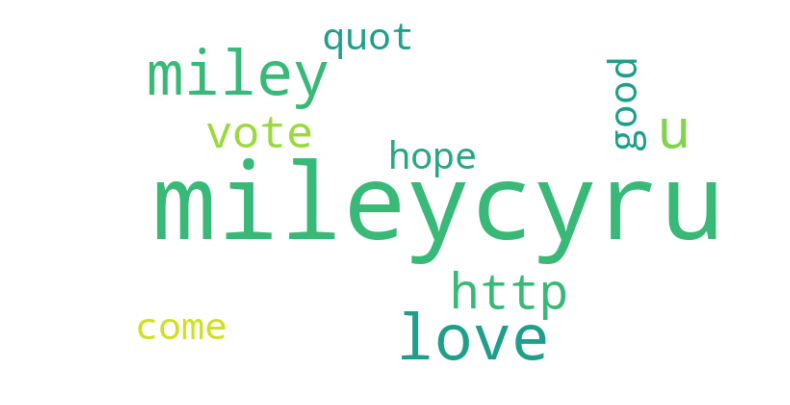

In [15]:
all_words_mileycyrus = [word for context in corpus_mileycyrus['Stemmed_Context'] for word in context]
generate_wordcloud(all_words_mileycyrus, '@mileycyrus')

# Corpus 2 

In [17]:
corpus_tommcfly = df[df['Tweet'].str.contains('@tommcfly')].copy()
corpus_tommcfly['Length'] = corpus_tommcfly['Tweet'].apply(len)
print("Corpus para @tommcfly:")
print(corpus_tommcfly[['ID', 'Timestamp', 'Length', 'Tweet']].head())

Corpus para @tommcfly:
           ID                     Timestamp  Length  \
0  1468210813  Tue Apr 07 00:19:09 PDT 2009     138   
0  1468233211  Tue Apr 07 00:26:52 PDT 2009     131   
0  1468391638  Tue Apr 07 01:23:07 PDT 2009      96   
0  1468502040  Tue Apr 07 02:03:41 PDT 2009     108   
0  1468618787  Tue Apr 07 02:46:02 PDT 2009     131   

                                               Tweet  
0  @tommcfly hey saw u guys play @ pushover..didn...  
0  @tommcfly Good morning Tom! Why can't I send y...  
0  @tommcfly did you know that johnsons baby use ...  
0  @dougiemcfly @tommcfly good morning guys, how ...  
0  @tommcfly hey, no chance of adding brighton or...  


# Stopwords 2

In [19]:
corpus_tommcfly['Context'] = corpus_tommcfly['Tweet'].apply(extract_context)
print("Contexto limpio para @tommcfly:")
print(corpus_tommcfly[['Tweet', 'Context']].head())

Contexto limpio para @tommcfly:
                                               Tweet  \
0  @tommcfly hey saw u guys play @ pushover..didn...   
0  @tommcfly Good morning Tom! Why can't I send y...   
0  @tommcfly did you know that johnsons baby use ...   
0  @dougiemcfly @tommcfly good morning guys, how ...   
0  @tommcfly hey, no chance of adding brighton or...   

                                             Context  
0  [tommcfly, hey, saw, u, guys, play, pushover, ...  
0  [tommcfly, Good, morning, Tom, ca, send, messa...  
0  [tommcfly, know, johnsons, baby, use, animals,...  
0  [dougiemcfly, tommcfly, good, morning, guys, k...  
0  [tommcfly, hey, chance, adding, brighton, east...  


# Stemming y Lemmatización 2

In [21]:
corpus_tommcfly['Stemmed_Context'] = corpus_tommcfly['Context'].apply(stem_words)
print("Contexto con stemming para @tommcfly:")
print(corpus_tommcfly[['Tweet', 'Stemmed_Context']].head())

Contexto con stemming para @tommcfly:
                                               Tweet  \
0  @tommcfly hey saw u guys play @ pushover..didn...   
0  @tommcfly Good morning Tom! Why can't I send y...   
0  @tommcfly did you know that johnsons baby use ...   
0  @dougiemcfly @tommcfly good morning guys, how ...   
0  @tommcfly hey, no chance of adding brighton or...   

                                     Stemmed_Context  
0  [tommcfli, hey, saw, u, guy, play, pushov, get...  
0  [tommcfli, good, morn, tom, ca, send, messag, ...  
0  [tommcfli, know, johnson, babi, use, anim, lik...  
0  [dougiemcfli, tommcfli, good, morn, guy, know,...  
0  [tommcfli, hey, chanc, ad, brighton, eastbourn...  


# WordCloud 2

Top 10 palabras para @tommcfly:
tommcfli: 3887
tom: 711
love: 491
pleas: 486
u: 361
come: 348
say: 321
xx: 307
guy: 290
good: 274


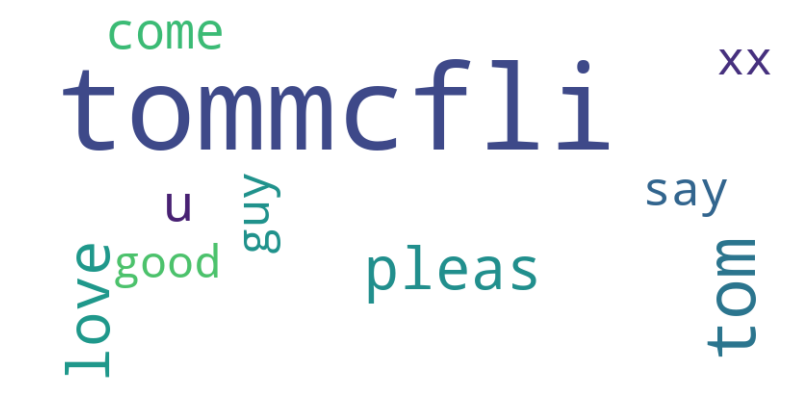

In [23]:
all_words_tommcfly = [word for context in corpus_tommcfly['Stemmed_Context'] for word in context]
generate_wordcloud(all_words_tommcfly, '@tommcfly')

# Corpus 3

In [25]:
corpus_ddlovato = df[df['Tweet'].str.contains('@ddlovato')].copy()
corpus_ddlovato['Length'] = corpus_ddlovato['Tweet'].apply(len)
print("Corpus para @ddlovato:")
print(corpus_ddlovato[['ID', 'Timestamp', 'Length', 'Tweet']].head())

Corpus para @ddlovato:
           ID                     Timestamp  Length  \
0  1467929230  Mon Apr 06 22:51:34 PDT 2009      47   
0  1467953367  Mon Apr 06 22:58:30 PDT 2009      40   
0  1469661950  Tue Apr 07 07:02:58 PDT 2009      96   
0  1469674492  Tue Apr 07 07:05:11 PDT 2009      79   
0  1548280868  Fri Apr 17 20:31:31 PDT 2009      85   

                                               Tweet  
0    @ddlovato @David_Henrie ummmmm i cant find it.   
0           @ddlovato Do you hate us?? Please don't   
0  @ddlovato Wish that i could see it..  Thats th...  
0  @ddlovato hey demi, wen are you and selena gon...  
0  @ddlovato ahhhh i wish i could go to the dalla...  


# Stopwords 3

In [27]:
corpus_ddlovato['Context'] = corpus_ddlovato['Tweet'].apply(extract_context)
print("Contexto limpio para @ddlovato:")
print(corpus_ddlovato[['Tweet', 'Context']].head())

Contexto limpio para @ddlovato:
                                               Tweet  \
0    @ddlovato @David_Henrie ummmmm i cant find it.    
0           @ddlovato Do you hate us?? Please don't    
0  @ddlovato Wish that i could see it..  Thats th...   
0  @ddlovato hey demi, wen are you and selena gon...   
0  @ddlovato ahhhh i wish i could go to the dalla...   

                                             Context  
0                     [ddlovato, ummmmm, cant, find]  
0                       [ddlovato, hate, us, Please]  
0  [ddlovato, Wish, could, see, Thats, downside, ...  
0  [ddlovato, hey, demi, wen, selena, gon, na, an...  
0  [ddlovato, ahhhh, wish, could, go, dallas, sho...  


# Stemming y Lemmatización 3

In [29]:
corpus_ddlovato['Stemmed_Context'] = corpus_ddlovato['Context'].apply(stem_words)
print("Contexto con stemming para @ddlovato:")
print(corpus_ddlovato[['Tweet', 'Stemmed_Context']].head())

Contexto con stemming para @ddlovato:
                                               Tweet  \
0    @ddlovato @David_Henrie ummmmm i cant find it.    
0           @ddlovato Do you hate us?? Please don't    
0  @ddlovato Wish that i could see it..  Thats th...   
0  @ddlovato hey demi, wen are you and selena gon...   
0  @ddlovato ahhhh i wish i could go to the dalla...   

                                     Stemmed_Context  
0                     [ddlovato, ummmmm, cant, find]  
0                        [ddlovato, hate, us, pleas]  
0  [ddlovato, wish, could, see, that, downsid, li...  
0  [ddlovato, hey, demi, wen, selena, gon, na, an...  
0  [ddlovato, ahhhh, wish, could, go, dalla, show...  


# worldcloud 3

Top 10 palabras para @ddlovato:
ddlovato: 3466
love: 649
demi: 601
u: 459
come: 347
go: 316
pleas: 308
see: 273
wish: 257
hope: 257


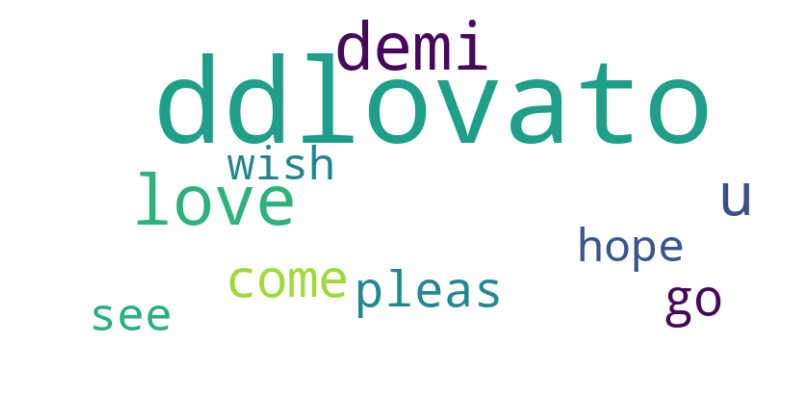

In [31]:
all_words_ddlovato = [word for context in corpus_ddlovato['Stemmed_Context'] for word in context]
generate_wordcloud(all_words_ddlovato, '@ddlovato')